In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")

In [3]:
test = pd.read_csv("test.csv")

In [4]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_ID = train['PassengerId']
test_ID = test['PassengerId']

In [7]:
train = train.drop('PassengerId',axis=1)
test = test.drop('PassengerId',axis=1)
# passenger Id seems irrelatived to the survival.Therefore, we drop those data.

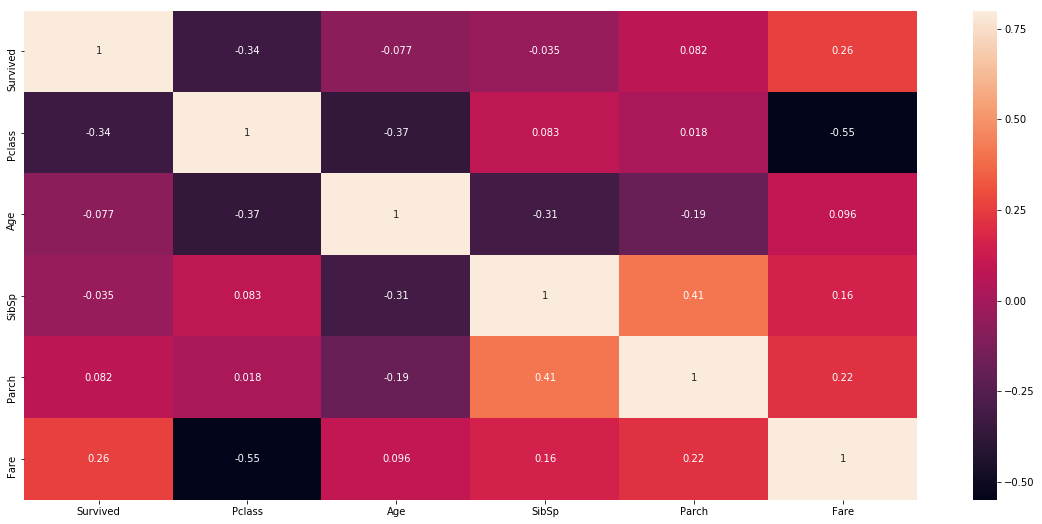

In [8]:
corrmat = train.corr()
plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True)

,Sex,Survived
0,female,0.742038
1,male,0.188908


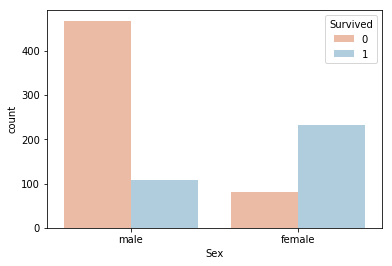

In [9]:
sns.countplot(x='Sex', hue='Survived', data=train, palette='RdBu')
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


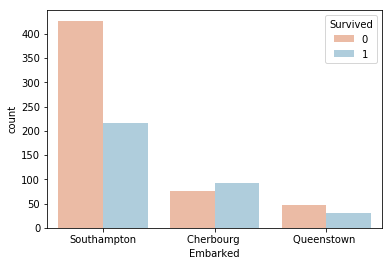

In [10]:
# 'Embarked' feature 
sns.countplot(x='Embarked', hue='Survived', data=train, palette='RdBu')
plt.xticks([0,1,2],['Southampton','Cherbourg ','Queenstown '])
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


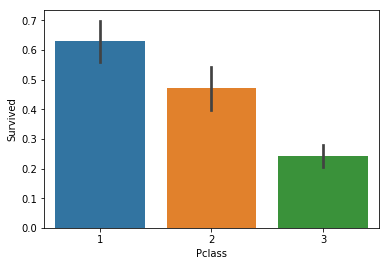

In [11]:
sns.barplot(train.Pclass ,train.Survived)
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

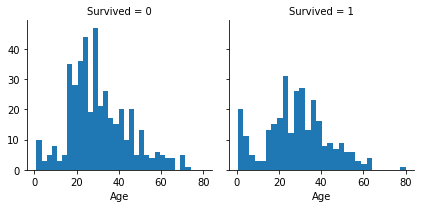

In [12]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=30)

## Observations.

- Infants (Age <=4) had high survival rate.
- Oldest passengers (Age = 80) survived.
- Large number of 15-25 year olds did not survive.
- Most passengers are in 15-35 age range.

In [13]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.Survived.values
all_data = pd.concat((train, test)).reset_index(drop=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (1309, 11)


In [14]:
missingData = all_data.isnull().sum().sort_values(ascending=False)
percentageMissing = ((all_data.isnull().sum()/all_data.isnull().count())*100).sort_values(ascending=False)
totalMissing = pd.concat([missingData, percentageMissing], axis=1, keys=['Total','Percentage'])
totalMissing

,Total,Percentage
Cabin,1014,77.463713
Survived,418,31.932773
Age,263,20.091673
Embarked,2,0.152788
Fare,1,0.076394
Ticket,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Pclass,0,0.000000
Parch,0,0.000000


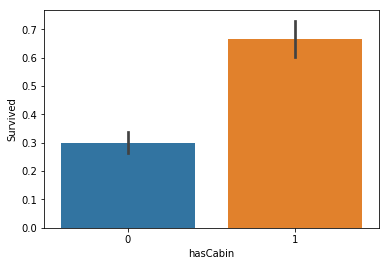

In [15]:
all_data["hasCabin"] = (all_data["Cabin"].notnull().astype('int'))
sns.barplot(x="hasCabin", y="Survived", data=all_data)
plt.show()

In [16]:
all_data[['hasCabin', 'Survived']].groupby(['hasCabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,hasCabin,Survived
1,1,0.666667
0,0,0.299854


In [17]:
#we can also drop the Ticket column since it doesn't have any special pattern that could aid us with predictions.
all_data = all_data.drop('Ticket',axis=1)

In [18]:
## we use 'hasCarbin' to replace 'Cabin' column
all_data = all_data.drop('Cabin',axis=1)

In [19]:
#sibsp: Number of Siblings/Spouses Aboard
#parch: Number of Parents/Children Aboard
all_data['FamilySize'] = all_data['SibSp'] + all_data['Parch'] + 1

In [20]:
all_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [21]:
for dataset in all_data:
    all_data['IsAlone'] = 0
    all_data.loc[all_data['FamilySize'] == 1, 'IsAlone'] = 1

all_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [22]:
#drop Parch, Sibsp,FamilySize
all_data = all_data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
all_data.head()

,Age,Embarked,Fare,Name,Pclass,Sex,Survived,hasCabin,IsAlone
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",3,male,0.0,0,0
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,1.0,1,0
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",3,female,1.0,0,1
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,1.0,1,0
4,35.0,S,8.0500,"Allen, Mr. William Henry",3,male,0.0,0,1


In [23]:
# replacing the 2 missing values in the Embarked feature with S
# since majority of people embarked in Southampton (S)
all_data = all_data.fillna({"Embarked": "S"})

In [24]:
all_data.head()

,Age,Embarked,Fare,Name,Pclass,Sex,Survived,hasCabin,IsAlone
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",3,male,0.0,0,0
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,1.0,1,0
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",3,female,1.0,0,1
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,1.0,1,0
4,35.0,S,8.0500,"Allen, Mr. William Henry",3,male,0.0,0,1


In [25]:
all_data['Title'] = all_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(all_data['Title'], all_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


In [26]:
# we can replace some titles as Mr, Miss and other
for i,row in all_data.iterrows():
    x = all_data.loc[i].at['Title']
    if x in ['Capt','Col','Don' ,'Dr' ,'Major','Rev' ,'Sir']:
        all_data.at[i,'Title']= 'Mr'
    if x in ['Mlle','Ms' ,'Dona' ,'Lady']:
        all_data.at[i,'Title']= 'Miss'
    if x in ['Countess','Jonkheer','Mme']:
        all_data.at[i,'Title'] = 'other'
        
pd.crosstab(all_data['Title'], all_data['Sex'])

Sex,female,male
Title,,
Master,0,61
Miss,266,0
Mr,1,781
Mrs,197,0
other,2,1


In [27]:
allFemales = all_data[all_data['Sex']=='female'] # select all females
ThatOneFemale = allFemales[all_data['Title']=='Mr'] # select all females with title Mr
ThatOneFemale

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Age,Embarked,Fare,Name,Pclass,Sex,Survived,hasCabin,IsAlone,Title
796,49.0,S,25.9292,"Leader, Dr. Alice (Farnham)",1,female,1.0,1,1,Mr


In [28]:
all_data.at[796,'Title']='Mrs'
pd.crosstab(all_data['Title'], all_data['Sex'])

Sex,female,male
Title,,
Master,0,61
Miss,266,0
Mr,0,781
Mrs,198,0
other,2,1


In [29]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "other": 5}
for i,row in all_data.iterrows():
    if all_data.loc[i].at['Title'] in title_mapping:
        all_data.at[i,'Title']= title_mapping[all_data.loc[i].at['Title']]
# all_data['Title']
all_data.head()

,Age,Embarked,Fare,Name,Pclass,Sex,Survived,hasCabin,IsAlone,Title
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",3,male,0.0,0,0,1
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,1.0,1,0,3
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",3,female,1.0,0,1,2
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,1.0,1,0,3
4,35.0,S,8.0500,"Allen, Mr. William Henry",3,male,0.0,0,1,1


In [30]:
Mr_age = all_data[all_data['Title']==1].Age.mean()
Miss_age = all_data[all_data['Title']==2].Age.mean()
Mrs_age = all_data[all_data['Title']==3].Age.mean()
Master_age = all_data[all_data['Title']==4].Age.mean()
Other_age = all_data[all_data['Title']==5].Age.mean()
print(Mr_age, Miss_age, Mrs_age , Master_age, Other_age)

32.77566225165563 22.026 37.06432748538012 5.482641509433963 31.666666666666668


In [31]:
group_age_mapping = {1:Mr_age, 2: Miss_age, 3:Mrs_age, 4:Master_age, 5:Other_age}

for index,row in all_data.iterrows():
    if np.isnan(all_data.loc[index].at['Age']):
        all_data.at[index,'Age'] = group_age_mapping[all_data.loc[index].at['Title']]

In [32]:
#Now drop the name column since we don't need them any more
all_data.drop('Name',axis=1,inplace=True)

In [33]:
sex_mapping = {"male": 0, "female": 1}
embarked_mapping = {"S": 1, "C": 2, "Q": 3}

for i,row in all_data.iterrows():
    if all_data.loc[i].at['Sex'] in sex_mapping:
        all_data.at[i,'Sex']= sex_mapping[all_data.loc[i].at['Sex']]
    if all_data.loc[i].at['Embarked'] in embarked_mapping:
        all_data.at[i,'Embarked']= embarked_mapping[all_data.loc[i].at['Embarked']]
all_data.head()

,Age,Embarked,Fare,Pclass,Sex,Survived,hasCabin,IsAlone,Title
0,22.0,1,7.2500,3,0,0.0,0,0,1
1,38.0,2,71.2833,1,1,1.0,1,0,3
2,26.0,1,7.9250,3,1,1.0,0,1,2
3,35.0,1,53.1000,1,1,1.0,1,0,3
4,35.0,1,8.0500,3,0,0.0,0,1,1


In [34]:
# fill Nans in Fare column with the mode 
mode = all_data['Fare'].mode() # extract the mode
all_data['Fare'].fillna(mode[0], inplace=True) 
all_data.drop('Survived',axis=1, inplace=True) # drop survived column

In [35]:
missingData = all_data.isnull().sum().sort_values(ascending=False)
percentageMissing = ((all_data.isnull().sum()/all_data.isnull().count())*100).sort_values(ascending=False)
totalMissing = pd.concat([missingData, percentageMissing], axis=1, keys=['Total','Percentage'])
totalMissing

,Total,Percentage
Title,0,0.0
IsAlone,0,0.0
hasCabin,0,0.0
Sex,0,0.0
Pclass,0,0.0
Fare,0,0.0
Embarked,0,0.0
Age,0,0.0


In [36]:
all_data.head()

,Age,Embarked,Fare,Pclass,Sex,hasCabin,IsAlone,Title
0,22.0,1,7.2500,3,0,0,0,1
1,38.0,2,71.2833,1,1,1,0,3
2,26.0,1,7.9250,3,1,0,1,2
3,35.0,1,53.1000,1,1,1,0,3
4,35.0,1,8.0500,3,0,0,1,1


In [37]:
FareBand = pd.qcut(all_data['Fare'], 4)
FareBand.unique()

[(-0.001, 7.896], (31.275, 512.329], (7.896, 14.454], (14.454, 31.275]]
Categories (4, interval[float64]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.275] < (31.275, 512.329]]

In [38]:
for i,row in all_data.iterrows():
    currFare=all_data.loc[i].at['Fare']
    if (currFare > -0.001 and currFare <=7.896):
        all_data.at[i,'Fare'] = 1
    if (currFare > 7.896 and currFare <=14.454):
        all_data.at[i,'Fare'] = 2
    if (currFare > 140454 and currFare <=31.275):
        all_data.at[i,'Fare'] = 3
    if (currFare > 31.275 and currFare <=512.329):
        all_data.at[i,'Fare'] = 4
        
all_data.head(10)

,Age,Embarked,Fare,Pclass,Sex,hasCabin,IsAlone,Title
0,22.000000,1,1.0000,3,0,0,0,1
1,38.000000,2,4.0000,1,1,1,0,3
2,26.000000,1,2.0000,3,1,0,1,2
3,35.000000,1,4.0000,1,1,1,0,3
4,35.000000,1,2.0000,3,0,0,1,1
5,32.775662,3,2.0000,3,0,0,1,1
6,54.000000,1,4.0000,1,0,1,1,1
7,2.000000,1,21.0750,3,0,0,0,4
8,27.000000,1,2.0000,3,1,0,0,3
9,14.000000,2,30.0708,2,1,0,0,3


In [39]:
target = train['Survived']
trainData = all_data[0:ntrain]
testData = all_data[ntrain:]
target.shape, trainData.shape, testData.shape

((891,), (891, 8), (418, 8))

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(trainData, target, test_size=0.2, random_state=0)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((712, 8), (712,), (179, 8), (179,))

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(trainData, target, test_size=0.2, random_state=0)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((712, 8), (712,), (179, 8), (179,))

In [42]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(accuracy_score(y_pred, y_test), 2)
print(acc_gaussian)

0.79


In [43]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_logreg = round(accuracy_score(y_pred, y_test), 2)
print(acc_logreg)

0.83


In [44]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) , 2)
print(acc_randomforest)

0.83


In [45]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
y_pred = gbk.predict(X_test)
acc_gbk = round(accuracy_score(y_pred, y_test) , 2)
print(acc_gbk)

0.83


In [46]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
y_pred = decisiontree.predict(X_test)
acc_decisiontree = round(accuracy_score(y_pred, y_test), 2)
print(acc_decisiontree)

0.82


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [48]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) , 2)
acc_perceptron

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.69

In [49]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train), 2)
acc_linear_svc

0.82

In [50]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train),2)
acc_sgd

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.66

In [51]:
models = pd.DataFrame({
    'Model': ['Gaussian Naive Bayes', 'Logistic Regression', 
              'Random Forest', 'Gradient Boosting Classifier', 
              'Decision Tree'],
    'Score': [acc_gaussian, acc_logreg, acc_randomforest, 
              acc_gbk, acc_decisiontree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Logistic Regression,0.83
2,Random Forest,0.83
3,Gradient Boosting Classifier,0.83
4,Decision Tree,0.82
0,Gaussian Naive Bayes,0.79


it seems that Gradient Boosting Classifier gives us the best model. let's go ahead and submit the results 

In [52]:
#predictions for submission
predictions = randomforest.predict(testData)

In [53]:
output = pd.DataFrame({ 'PassengerId' : test_ID, 'Survived': predictions })
output.to_csv('submission_randomforest.csv', index=False)